# Mobility expenditure in Spain Exploration

This  notebook tries to solve questions that could indicate a change in mobility in the last years. This is done by exploring the datasets of the Spanish household expenditure survey.

## Table of Contents
<ol>
<li><a href="#business">Business Understanding</a></li>
<li><a href="#dataunderstanding">Data Understanding</a></li>
<li><a href="#datapreparation"> Data Preparation</a>
    <ol>
        <li><a href="#datawrangling"> Data Wrangling</a></li>
            <ul>
                <li><a href="#gath">Gathering</a></li>
                <li><a href="#asse">Assessing</a></li>
                <li><a href="#clea">Cleaning</a></li>
            </ul> 
        <li><a href="#eda"> Data Analysis</a></li>
        </li>
    </ol> 
<li><a href="#result">Result Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Refere">References</a></li>    
</ol>

<a id='business'></a>
## 1. Business Understanding

### Goals
For this case study, the primary goal is to check the economic impact of new mobility trends on the transportation expenditures of Spanish people.  
This impact will be assessed by answering the following questions:
1. Have there been significant changes in private car ownership in the last five years?   
    1.1 Exploration of private car purchases.  
    1.2 Exploration of traditional fuel and alternative fuels spendings.   
    1.3 Driving licences and private vehicle circulatory tax spendings.
2. Are Personal Mobility Vehicles purchases on a rise?
    2.1 Exploration of personal mobility vehicles purchases  
3. Are combined public transportation tickets and shared options on the rise?
    3.1 Exploration of public transportation individual and combined tickets
    3.2 Exploratin of shared mobility options expenditures
4. What variables correlate well with car-oriented mobility?

<a id='dataunderstanding'></a>
## 2. Data Understanding

### Data collection

These questions require to know how much of the household spendings are destinated to transportation. Also within the transportation expenses it would be interesting to know what are the transportation means employed.  
Household budget surveys are widely spread datasets collected by many countries. They focus on households expenditures and provide a picture of living conditions of a given country.(cita eurostat hbs). These surveys could be useful to answer the questions of interest.

From the wide variety of countries providing these datasets, the ones from Spain were selected to be analyzed. These could be later be compared with data already analyzed and provided by the USA as a means to see evident differences within the two countries. 

Data from the spanish household expenditure survey was downloaded from the National Statistics Institute. Survey results are divided in three files. The first one includes the expenditures of all families, the second describes the household and the third one provides details related to the members of the household. This study will make use of the first two.
These datasets were included in this repository.

<a id='datapreparation'></a>
## 3. Data Preparation

Each data file comes with .docx documents explaining the meaning of the columns and units.  

<a id='datawrangling'></a>
### Data wrangling

#### Required dependencies

In [123]:
# Imports

# data preparation and analysis 
import pandas as pd
import numpy as np

# file handling
import requests as rd
import zipfile

# statistics
from scipy import stats
import random

# data visualization 
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
import IPython.display
from IPython.display import display, clear_output


<a id='gath'></a>
### Gathering

As explained above each year is described in three datasets (spendings, household information and household member information).  
For The options of creating one dataset per year would leave us with 15 dataframes which are too many; another option would be to generate three datasets with all 5 years, but then it would be difficult to get insights for specific households for specific years.  
This is because household number is the one thing linking the three files together and they are repeated over the years. For now the option is creating three dictionaries (spendings, household information and household member information) with 5 dataframes; one per year.  

In [3]:
# Required constants
path2data = 'data'
years = [2018, 2019, 2020, 2021, 2022]
df_dict_keys = list(map(str, years))

# Import data into dicts
# Creation of expenses dataframes' dict
dfs_ = []
for i in range(len(df_dict_keys)):
    file_year_zip = f"{path2data}/EPFgastos_{years[i]}.csv.zip"
    file_zipfile = zipfile.ZipFile(file_year_zip)
    df = pd.read_csv(file_zipfile.open(file_year_zip[5:-4]), sep='\t', low_memory=False)
    dfs_.append(df)
dict_df_EPF_all_expenses = dict(zip(df_dict_keys, dfs_))

In [4]:
# Creation of households dataframes' dict
dfs_households = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_households.append(df)
dict_df_EPF_all_households = dict(zip(df_dict_keys, dfs_households))

In [5]:
# Creation of household member information dataframes' dict
dfs_membersHouseholds = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFmhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_membersHouseholds.append(df)
dict_df_EPF_all_memberHouseholds = dict(zip(df_dict_keys, dfs_membersHouseholds))

> The datasets are inspected to make sure the dictionaries were created correctly.

In [6]:
dict_df_EPF_all_expenses['2019']

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2019,1,01111,28314.98,0.0,0.0,37127.76,28314.98,NaN,NaN,NaN,NaN,NaN,1294.618356
1,2019,1,01113,372283.47,0.0,0.0,256519.10,372283.47,NaN,NaN,NaN,NaN,NaN,1294.618356
2,2019,1,01114,35484.02,0.0,0.0,27002.01,35484.02,NaN,NaN,NaN,NaN,NaN,1294.618356
3,2019,1,01118,82437.14,0.0,0.0,10125.75,82437.14,NaN,NaN,NaN,NaN,NaN,1294.618356
4,2019,1,01122,293370.09,0.0,0.0,91131.79,293370.09,NaN,NaN,NaN,NaN,NaN,1294.618356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889673,2019,20817,12111,3634.29,0.0,100.0,NaN,3634.29,NaN,NaN,NaN,NaN,NaN,534.816259
1889674,2019,20817,12521,128355.90,0.0,0.0,NaN,128355.90,NaN,NaN,NaN,NaN,NaN,534.816259
1889675,2019,20817,12541,248689.56,0.0,0.0,NaN,248689.56,NaN,NaN,NaN,NaN,NaN,534.816259
1889676,2019,20817,12704,411.43,0.0,100.0,NaN,411.43,NaN,NaN,NaN,NaN,NaN,534.816259


In [7]:
dict_df_EPF_all_households['2020']

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2020,1,12,1,6,3,3,1,1,1593.985745,...,2,2,2726,6,2,56,0,0,0,56
1,2020,2,5,7,1,1,1,1,1,259.167031,...,1,1,4998,7,2,60,0,0,0,60
2,2020,3,5,7,1,1,1,1,1,529.688667,...,3,3,1245,3,2,56,0,0,0,56
3,2020,4,10,5,6,3,2,2,2,1034.909802,...,3,3,3106,7,2,54,0,0,0,54
4,2020,5,16,2,6,2,1,2,2,371.914654,...,4,3,1250,3,1,112,0,0,0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,2020,19166,7,4,6,5,3,1,1,580.026322,...,3,3,2185,5,1,56,0,0,0,56
19166,2020,19167,9,5,6,5,3,2,2,2578.309998,...,2,2,2200,5,1,112,0,0,0,112
19167,2020,19168,9,5,6,5,3,2,2,1846.706676,...,1,1,2215,5,2,81,0,0,0,81
19168,2020,19169,10,5,6,3,2,2,2,1571.709414,...,3,3,1365,3,1,28,0,0,0,28


In [8]:
dict_df_EPF_all_memberHouseholds['2019']

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2019,1,1,1,1,1,56,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,1294.618356
1,2019,1,2,1,6,2,64,1,1,1,...,2,2,,1,-9.0,02,6,6,1,1294.618356
2,2019,1,3,1,6,3,27,1,1,1,...,2,2,,6,NaN,,6,6,1,1294.618356
3,2019,2,1,1,1,1,69,1,1,1,...,2,2,,1,-9.0,05,6,6,1,1569.018845
4,2019,3,1,1,1,1,66,6,1,1,...,2,2,,1,558.0,02,6,6,1,332.468410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54032,2019,20816,4,1,6,3,10,1,1,1,...,,,,6,NaN,,1,1,6,371.083222
54033,2019,20816,5,1,6,3,3,6,1,1,...,,,,6,NaN,,1,1,6,371.083222
54034,2019,20817,1,1,1,1,72,1,1,1,...,2,2,,1,-9.0,02,6,6,1,534.816259
54035,2019,20817,2,1,6,2,67,6,1,1,...,2,2,,6,NaN,,6,6,1,534.816259



<a id='asse'></a>
### Assessing


<p style='text-align: justify;'> This part of the analysis will focus on identifying those aspects of the datasets to improve. These improvements will make the posterior modelling possible. </p>

**Inspection of the expenses table:**

In [9]:
# Visual inspection 
dict_df_EPF_all_expenses['2022'].head()

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2022,1,01111,4904.58,100.00,0.0,1563.96,4904.58,NaN,NaN,NaN,NaN,NaN,299.937215
1,2022,1,01112,2202.06,100.00,0.0,NaN,2202.06,NaN,NaN,NaN,NaN,NaN,299.937215
2,2022,1,01113,191447.43,32.34,0.0,56302.55,191447.43,NaN,NaN,NaN,NaN,NaN,299.937215
3,2022,1,01114,54403.90,100.00,0.0,9383.76,54403.90,NaN,NaN,NaN,NaN,NaN,299.937215
4,2022,1,01115,8617.42,100.00,0.0,NaN,8617.42,NaN,NaN,NaN,NaN,NaN,299.937215


In [10]:
# Display basic information
dict_df_EPF_all_expenses['2022'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437060 entries, 0 to 1437059
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ANOENC     1437060 non-null  int64  
 1   NUMERO     1437060 non-null  int64  
 2   CODIGO     1437060 non-null  object 
 3   GASTO      1437060 non-null  float64
 4   PORCENDES  1437060 non-null  float64
 5   PORCENIMP  1437060 non-null  float64
 6   CANTIDAD   545314 non-null   float64
 7   GASTOMON   1437058 non-null  float64
 8   GASTNOM1   2537 non-null     float64
 9   GASTNOM2   934 non-null      float64
 10  GASTNOM3   1868 non-null     float64
 11  GASTNOM4   20665 non-null    float64
 12  GASTNOM5   0 non-null        float64
 13  FACTOR     1437060 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 153.5+ MB


In [11]:
# Verify the data types of 'CODIGO'
type(dict_df_EPF_all_expenses['2022']['CODIGO'][9])

str

> The columns with most missing values seem to be the ones named 'GASTNOM#'.  
The description file indicated that these columns are reserved for expenses that were paid with non-money related ways. These could be labor, work tickets, etc.

In [12]:
# Look at unique values
dict_df_EPF_all_expenses['2022'].nunique()

ANOENC             1
NUMERO         20585
CODIGO           360
GASTO        1241913
PORCENDES       9652
PORCENIMP       8478
CANTIDAD      365169
GASTOMON     1218944
GASTNOM1        2474
GASTNOM2         917
GASTNOM3        1772
GASTNOM4       20378
GASTNOM5           0
FACTOR         17861
dtype: int64

In [13]:
# Look at duplicated values
sum(dict_df_EPF_all_expenses['2022'].duplicated())

0

In [14]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} expenses' info table is composed by {dict_df_EPF_all_expenses[year].shape[0]:,} rows and {dict_df_EPF_all_expenses[year].shape[1]} columns.")

2018 expenses' info table is composed by 1,924,175 rows and 14 columns.
2019 expenses' info table is composed by 1,889,678 rows and 14 columns.
2020 expenses' info table is composed by 1,568,629 rows and 14 columns.
2021 expenses' info table is composed by 1,488,799 rows and 14 columns.
2022 expenses' info table is composed by 1,437,060 rows and 14 columns.


> All tables share the same number of columns but the rows vary.

In [15]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the spending habits of {len(dict_df_EPF_all_expenses[year]['NUMERO'].unique()):,} families.")

2018 describes the spending habits of 21,395 families.
2019 describes the spending habits of 20,817 families.
2020 describes the spending habits of 19,169 families.
2021 describes the spending habits of 19,394 families.
2022 describes the spending habits of 20,585 families.


> The year describing more families is 2018. This has little impact on the results traslated to the population because each family includes an expansion factor that links the sample household with the number of homes they represent in the population

In [16]:
# Look at statistics 
dict_df_EPF_all_expenses['2021'].describe()

,ANOENC,NUMERO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
count,1488799.0,1.488799e+06,1.488799e+06,1.488799e+06,1.488799e+06,5.901330e+05,1.488797e+06,2.447000e+03,1.530000e+03,1.895000e+03,1.974900e+04,0.0,1.488799e+06
mean,2021.0,9.679386e+03,3.705809e+05,3.762530e+01,1.440463e+01,2.589946e+05,2.855865e+05,6.147322e+05,1.852813e+05,9.562027e+05,6.225154e+06,NaN,9.834518e+02
std,0.0,5.587630e+03,1.638910e+06,4.756322e+01,3.450117e+01,1.270695e+06,1.288340e+06,3.027980e+06,7.675572e+05,3.138617e+06,6.322289e+06,NaN,7.368025e+02
min,2021.0,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.001000e+01,0.000000e+00,0.000000e+00,7.800000e-01,9.203000e+01,8.453072e+04,NaN,7.411386e+01
25%,2021.0,4.839000e+03,5.591385e+03,0.000000e+00,0.000000e+00,8.155760e+03,4.469960e+03,7.190204e+04,1.165194e+04,8.113860e+03,2.542857e+06,NaN,4.572252e+02
50%,2021.0,9.692000e+03,5.160908e+04,0.000000e+00,0.000000e+00,2.711620e+04,4.705294e+04,1.723470e+05,4.862174e+04,1.010220e+05,4.230137e+06,NaN,7.823255e+02
75%,2021.0,1.448200e+04,2.151886e+05,1.000000e+02,0.000000e+00,9.268774e+04,1.973388e+05,3.956287e+05,1.432249e+05,7.502103e+05,7.803856e+06,NaN,1.331782e+03
max,2021.0,1.939400e+04,2.797928e+08,1.000000e+02,1.000000e+02,1.118148e+08,2.797928e+08,1.020367e+08,1.637394e+07,5.707537e+07,2.444656e+08,NaN,9.423128e+03


In [17]:
# Look at statistics for categorical variables
dict_df_EPF_all_expenses['2020'].describe(include = 'object')

,CODIGO
count,1568629
unique,361
top,04511
freq,18850


**Inspection of the households table:**

In [18]:
# Visual inspection 
dict_df_EPF_all_households['2018'].head()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2018,1,2,2,1,1,1,2,2,422.866646,...,2,2,2324,5,2,54,0,0,0,54
1,2018,2,9,5,6,4,2,1,1,2051.951724,...,2,2,2682,6,2,64,0,0,0,64
2,2018,3,13,3,1,1,1,1,1,1349.187753,...,3,3,3240,7,2,52,0,0,0,52
3,2018,4,10,5,1,1,1,1,1,1200.012995,...,3,3,746,2,1,28,0,0,0,28
4,2018,5,1,6,6,3,2,1,1,887.660816,...,3,3,3150,7,2,54,0,0,2,56


In [19]:
# Display basic information
dict_df_EPF_all_households['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Columns: 188 entries, ANOENC to COMITOT
dtypes: float64(30), int64(97), object(61)
memory usage: 29.9+ MB


> Info is not showing information due to many columns. The verbose parameter is set True to check some columns.

In [20]:
# Display basic information
dict_df_EPF_all_households['2019'].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 188 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOENC         20817 non-null  int64  
 1    NUMERO         20817 non-null  int64  
 2    CCAA           20817 non-null  int64  
 3    NUTS1          20817 non-null  int64  
 4    CAPROV         20817 non-null  int64  
 5    TAMAMU         20817 non-null  int64  
 6    DENSIDAD       20817 non-null  int64  
 7    CLAVE          20817 non-null  int64  
 8    CLATEO         20817 non-null  int64  
 9    FACTOR         20817 non-null  float64
 10   NMIEMB         20817 non-null  int64  
 11   TAMANO         20817 non-null  int64  
 12   NMIEMSD        20817 non-null  int64  
 13   NMIEMHU        20817 non-null  int64  
 14   NMIEMIN        20817 non-null  int64  
 15   NMIEM1         20817 non-null  int64  
 16   NMIEM2         20817 non-null  int64  
 17   NMIEM3         20817 non-null

In [21]:
# Look at null values
dict_df_EPF_all_households['2022'].isnull().sum().sum()

444172

In [22]:
# Look at unique values
dict_df_EPF_all_households['2020'].nunique()

ANOENC         1
NUMERO     19170
CCAA          19
NUTS1          7
CAPROV         2
           ...  
COMIMH       183
COMISD        23
COMIHU        33
COMIINV       85
COMITOT      198
Length: 188, dtype: int64

In [23]:
# Look at duplicated values
sum(dict_df_EPF_all_households['2022'].duplicated())

0

In [24]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's info table is composed by {dict_df_EPF_all_households[year].shape[0]:,} rows and {dict_df_EPF_all_households[year].shape[1]} columns.")

2018 household's info table is composed by 21,395 rows and 188 columns.
2019 household's info table is composed by 20,817 rows and 188 columns.
2020 household's info table is composed by 19,170 rows and 188 columns.
2021 household's info table is composed by 19,394 rows and 188 columns.
2022 household's info table is composed by 20,585 rows and 188 columns.


> As before the number of households (rows) varies between years but not the no. of columns.

In [25]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {len(dict_df_EPF_all_households[year]['NUMERO'].unique()):,} families (sample).")    

2018 describes the housing conditions of 21,395 families (sample).
2019 describes the housing conditions of 20,817 families (sample).
2020 describes the housing conditions of 19,170 families (sample).
2021 describes the housing conditions of 19,394 families (sample).
2022 describes the housing conditions of 20,585 families (sample).


> As expected this information matches the one displayed in the expenses' table.

> Additionaly we could use the population factor to see how many families are represented by these samples.

In [26]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {sum(dict_df_EPF_all_households[year]['FACTOR'].unique()):,} families (population).")    

2018 describes the housing conditions of 16,250,884.721614044 families (population).
2019 describes the housing conditions of 16,382,540.574927999 families (population).
2020 describes the housing conditions of 16,639,759.770363979 families (population).
2021 describes the housing conditions of 16,417,174.825565014 families (population).
2022 describes the housing conditions of 16,713,176.268896982 families (population).


In [27]:
# Look at statistics
dict_df_EPF_all_households['2018'].describe()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,RENTAS,OTROIN,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
count,21395.0,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,...,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000
mean,2018.0,10698.000000,9.094835,3.749942,4.296565,2.715074,1.813788,1.422622,1.522038,870.655626,...,5.559477,5.788035,2155.686282,4.458565,1.589297,60.500444,0.118766,0.136060,4.220799,64.978593
std,0.0,6176.348841,5.015944,1.842902,2.369757,1.610837,0.847493,0.493988,0.499526,615.040256,...,1.585391,1.232785,1432.750748,1.937125,1.178040,31.919562,1.650964,2.216172,10.935581,33.321940
min,2018.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.061002,...,-9.000000,-9.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2018.0,5349.500000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.004649,...,6.000000,6.000000,1209.000000,3.000000,1.000000,34.000000,0.000000,0.000000,0.000000,41.000000
50%,2018.0,10698.000000,9.000000,4.000000,6.000000,3.000000,2.000000,1.000000,2.000000,689.051204,...,6.000000,6.000000,1800.000000,4.000000,2.000000,56.000000,0.000000,0.000000,0.000000,59.000000
75%,2018.0,16046.500000,13.000000,5.000000,6.000000,4.000000,3.000000,2.000000,2.000000,1182.371731,...,6.000000,6.000000,2736.000000,6.000000,2.000000,82.000000,0.000000,0.000000,3.000000,84.000000
max,2018.0,21395.000000,19.000000,7.000000,6.000000,5.000000,3.000000,2.000000,2.000000,6121.820126,...,6.000000,6.000000,17500.000000,10.000000,7.000000,308.000000,56.000000,125.000000,196.000000,308.000000


In [28]:
# Look at statistics for categorical variables
dict_df_EPF_all_households['2022'].describe(include = 'object')

,PAISSP,UNIONSP,JORNADASP,INTERINPSP,OCUPA,OCUPARED,ACTESTB,ACTESTBRED,SITPROF,SECTOR,...,FUENACV8,CALEFV8,FUENCAV8,REGTENV9,AGUACV9,FUENACV9,CALEFV9,FUENCAV9,FUENPRIN,FUENPRINRED
count,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585,...,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585
unique,4,4,3,9,12,7,22,5,6,4,...,1,1,1,1,1,1,1,1,9,5
top,,1,1,03,2,2,C,3,1,6,...,,,,,,,,,2,2
freq,18938,11391,11941,6309,3538,5963,3435,13277,16761,12325,...,20585,20585,20585,20585,20585,20585,20585,20585,10378,10378


**Inspection of the household members' table:**

In [29]:
# Visual inspection 
dict_df_EPF_all_memberHouseholds['2018'].head()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2018,1,1,1,1,1,53,1,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
1,2018,1,2,1,6,2,53,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
2,2018,2,1,1,1,1,43,1,1,1,...,1,1,1,1,-9.0,04,6,6,1,2051.951724
3,2018,2,2,1,6,2,42,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,2051.951724
4,2018,2,3,1,6,3,9,6,1,1,...,,,,6,NaN,,1,1,6,2051.951724


In [30]:
# Display basic information
dict_df_EPF_all_memberHouseholds['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANOENC       54037 non-null  int64  
 1   NUMERO       54037 non-null  int64  
 2   NORDEN       54037 non-null  int64  
 3   CATEGMH      54037 non-null  int64  
 4   SUSPRIN      54037 non-null  int64  
 5   RELASP       54037 non-null  int64  
 6   EDAD         54037 non-null  int64  
 7   SEXO         54037 non-null  int64  
 8   PAISNACIM    54037 non-null  int64  
 9   NACIONA      54037 non-null  int64  
 10  PAISNACION   54037 non-null  object 
 11  SITURES      54037 non-null  int64  
 12  ECIVILLEGAL  54037 non-null  int64  
 13  NORDENCO     54037 non-null  int64  
 14  UNION        54037 non-null  object 
 15  CONVIVENCIA  54037 non-null  int64  
 16  NORDENPA     54037 non-null  int64  
 17  PAISPADRE    54037 non-null  int64  
 18  NORDENMA     54037 non-null  int64  
 19  PAIS

In [31]:
# Verify the data types of 'PAISNACION'
type(dict_df_EPF_all_memberHouseholds['2021']['PAISNACION'][0])

str

In [32]:
# Look at unique values
dict_df_EPF_all_memberHouseholds['2018'].nunique()

ANOENC             1
NUMERO         21395
NORDEN            11
CATEGMH            4
SUSPRIN            2
RELASP             6
EDAD              86
SEXO               2
PAISNACIM          4
NACIONA            3
PAISNACION         4
SITURES            2
ECIVILLEGAL        5
NORDENCO          11
UNION              4
CONVIVENCIA        3
NORDENPA          10
PAISPADRE          5
NORDENMA          11
PAISMADRE          5
ESTUDIOS          10
ESTUDRED           6
SITUACT           10
SITURED            4
OCU                4
JORNADA            3
PERCEP             3
IMPEXACP        1797
INTERINP           9
NINODEP            3
HIJODEP            3
ADULTO             3
FACTOR         18363
dtype: int64

In [33]:
# Look at duplicated values
sum(dict_df_EPF_all_memberHouseholds['2018'].duplicated())

0

In [34]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's info table is composed by {dict_df_EPF_all_memberHouseholds[year].shape[0]:,} rows and {dict_df_EPF_all_memberHouseholds[year].shape[1]} columns.")

2018 household's info table is composed by 55,725 rows and 33 columns.
2019 household's info table is composed by 54,037 rows and 33 columns.
2020 household's info table is composed by 49,423 rows and 33 columns.
2021 household's info table is composed by 49,404 rows and 33 columns.
2022 household's info table is composed by 52,148 rows and 33 columns.


In [35]:
# Look at statistics
dict_df_EPF_all_memberHouseholds['2022'].describe()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,NORDENPA,PAISPADRE,NORDENMA,PAISMADRE,PERCEP,IMPEXACP,NINODEP,HIJODEP,ADULTO,FACTOR
count,52148.0,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,...,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,35453.000000,52148.000000,52148.000000,52148.000000,52148.000000
mean,2022.0,10279.885633,2.073291,1.000978,4.026291,2.079389,43.753509,3.565487,1.230440,1.121117,...,73.816292,1.285553,68.204936,1.295735,2.315583,488.447296,4.852209,4.867262,2.146832,901.627944
std,0.0,5939.262859,1.146288,0.041763,2.443999,1.140530,22.481900,2.499166,0.766754,0.408808,...,42.742317,0.855987,45.218442,0.865681,3.020692,828.710403,2.104131,2.094381,2.103515,671.861765
min,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,48.270897
25%,2022.0,5132.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,424.920887
50%,2022.0,10273.500000,2.000000,1.000000,6.000000,2.000000,47.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,709.770429
75%,2022.0,15420.250000,3.000000,1.000000,6.000000,3.000000,61.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,6.000000,926.000000,6.000000,6.000000,1.000000,1190.157681
max,2022.0,20585.000000,13.000000,4.000000,6.000000,6.000000,85.000000,6.000000,4.000000,3.000000,...,99.000000,4.000000,99.000000,4.000000,6.000000,17000.000000,6.000000,6.000000,6.000000,9983.726258


In [36]:
# Look at statistics for categorical variables
dict_df_EPF_all_memberHouseholds['2022'].describe(include = 'object')

,PAISNACION,UNION,ESTUDIOS,ESTUDRED,SITUACT,SITURED,OCU,JORNADA,INTERINP
count,52148,52148,52148,52148,52148,52148,52148,52148,52148
unique,4,4,10,6,10,4,4,3,9
top,,,3,4,1,1,1,,
freq,47414,25098,12566,15386,21317,26348,22425,29723,16695


#### Observations:
The main observations regarding data quality and tidiness are summarized below. Quality issues are divided by table and tidiness issues are presented together for all tables.

##### Quality
In general the quality of all datasets is good as they were already cleaned by the Statistics Institute. Aditional information on the information saved in the columns was obtained by carefully reading their instruction documents.

The required modifications are needed for this specific analisys.

###### `dict_df_EPF_all_expenses` DataFrames
- A column with the total spendings of each family is needed.
- Some columns are not required for the analysis.
- Some spending codes out of the origial 360 are not required for the analysis. 
- Missing values in GASTOMON# columns.
- Expenses are weighted spatially and temporarly.


###### `dict_df_EPF_all_households` DataFrames
- Some columns are not required for the analysis.
- There are some null vaues.

###### `dict_df_EPF_all_memberHouseholds` DataFrames
- Verify if table required for the analysis.

In general all column names could be translated to english to make more sense to non-spanish speaking audiences.

##### Tidiness
- The household number should be the observational unit in  `dict_df_EPF_all_expenses` DataFrames. First, the unrequired codes should be dropped and then the important ones should be turned into columns. This is required to join this table with the rest.
- All tables should be merged into one.


<a id='clea'></a>
### Cleaning

<p style='text-align: justify;'> The cleaning efforts carried out so as to fix the issues discovered in the previous section, are described herein. </p>

###### `dict_df_EPF_all_expenses` DataFrames

1. Create column with all expenses per family

_Define_

The colum with the monetary expenses is named 'GASTOMON' and according to the documentation the value displayed is elevated temporarily (year) and spatially (using the 'FACTOR' column).

_Test_

In [37]:
# Create two columns with total expenses, one annual and another monthly
total_expenses_yearly_list = []
total_expenses_monthly_list = []
for _year in df_dict_keys:
    total_expenses = dict_df_EPF_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum()
    total_expenses_monthly = dict_df_EPF_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum().div(12)
    total_expenses_yearly_list.append(total_expenses)
    total_expenses_monthly_list.append(total_expenses_monthly)
total_expenses_year_dict = dict(zip(df_dict_keys, total_expenses_yearly_list))
total_expenses_month_dict = dict(zip(df_dict_keys, total_expenses_monthly_list))

2. Selection of pertinent columns

_Define_

From this DataFrame only the following columns are pertinent:  
`['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']`  
This will also handle the missing values problem.

_Code_

In [38]:
# Drop unrequired columns
columns_expenses = ['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']
for year in df_dict_keys:
    dict_df_EPF_all_expenses[year].drop(
        dict_df_EPF_all_expenses[year].columns.difference(
            columns_expenses), axis = 1, inplace = True) 

_Test_

In [39]:
for year in df_dict_keys:
    print(dict_df_EPF_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')


3. Selection of pertinent consumption expenditures codes

_Define_

According to the documentation the category that relates to transportation is the ones starting with 07. First it is neccesary to know how many codes start with 07 in all DataFrames, then select the most important ones because these code rows will be later converted to columns and it would be preferable not to have too many columns.

_Code_

In [40]:
for year in df_dict_keys:
    s_ = pd.Series(dict_df_EPF_all_expenses[year].CODIGO.unique())
    count = len(s_[s_.str.startswith('07')].tolist())
    print(f'{year}: {count} expenses starting with 07')

2018: 32 expenses starting with 07
2019: 32 expenses starting with 07
2020: 32 expenses starting with 07
2021: 31 expenses starting with 07
2022: 32 expenses starting with 07


32 codes are too many to be turned into columns. The most relevant to the analysis will be selected. Some of the codes indicate the use of more ortodox ways of moving such car ownership (electric cars are part of this trend but no code indicated their pruchase), others indicate the use of new mobility trends and active and greener mobiliy options. All these codes refer to urban terrestrial mobility.
Out of 32 transportation codes the ones selected are:
- 071 - purchase of personal vehicles:
    - 07111 - new cars *
    - 07112 - used cars *
    - 07120 - motorbikes, electric bikes and personal mobility vehicles **
    - 07130 - bicycles **
- 072 - usage of personal vehicles:
    - 07221 - diesel fuel *
    - 07222 - gasoline *
    - 07223 - alternative fuels or electricity **
    - 07244 - driving license acquisition *
    - 07245 - mandatory circulation tax *
- 073 - Public transportation:
    - 07311 - train 
    - 07313 - subway/metro 
    - 07321 - bus 
    - 07322 - combined tickets **
    - 07324 - ridehailing, taxis, ridesharing  

The ones with * refer to more ortodox mobility and the ones with ** are those
newer mobility alternatives.

In [41]:
codes_mobility = ['07111','07112','07120','07130', '07211','07221',
'07222','07223','07244','07245','07311','07313','07321','07322','07324', '07350']

In [42]:
# Select codes of interest
for year in df_dict_keys:
    dict_df_EPF_all_expenses[year] = dict_df_EPF_all_expenses[year].loc[
        dict_df_EPF_all_expenses[year]['CODIGO'].isin(codes_mobility)]


_Test_

In [43]:
# Verify reduction in rows
for year in df_dict_keys:
    print(dict_df_EPF_all_expenses[year].shape)

(62817, 5)
(61853, 5)
(43036, 5)
(43442, 5)
(45731, 5)


3. Expenses are weighted

_Define_

- Lastly the monetary expense needs to be divided by the FACTOR and 12 to obtain the monthly expense of that particular family.

_Code_

In [44]:
# Creation of column with monthy expenses
for year in df_dict_keys:
    dict_df_EPF_all_expenses[year] = dict_df_EPF_all_expenses[year].copy()
    dict_df_EPF_all_expenses[year]['Monthly_Expense'] = dict_df_EPF_all_expenses[
        year]['GASTOMON'].div(dict_df_EPF_all_expenses[
            year]['FACTOR']).div(12)

_Test_

In [45]:
for year in df_dict_keys:
    print(dict_df_EPF_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')


##### Tidiness

*Define*

Change the shape of the table so each household number is an obervational unit. Codes are going to be columns with monthly expense as value. This will use the _pivot_ method.

*Code*

In [46]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_EPF_all_expenses.keys():
    print(dict_df_EPF_all_expenses[year].NUMERO.nunique())

18082
17527
15352
15711
16809


In [185]:
def Reshape_expenses(df:pd.DataFrame, year:str, value:str):
    '''
    INPUT: 
    DataFrame - with long format 
    year -  of the analysis
    OUTPUT: 
    DataFrame - with wide format
    
    '''
    # DataFrame reshape
    expenses = df.pivot(
        index='NUMERO',columns='CODIGO',values= value)
    expenses = expenses.fillna(0)

    # Codes name change
    df_ = expenses.add_prefix('code_')

    # inclusion of ANOENC, FACTOR
    df_temp =  df.copy()
    df_temp = df_temp.drop_duplicates(subset=['NUMERO'], keep='first')
    df_['FACTOR'] = np.where(df_.index == df_temp['NUMERO'], df_temp['FACTOR'], 0)
    df_['YEAR'] = int(year)

    return df_

*Test*

In [189]:
# Test function for monthly expenses
copy_dict = dict_df_EPF_all_expenses.copy()
df_allExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = Reshape_expenses(dict_df_EPF_all_expenses[year], year, 'Monthly_Expense')
    df_allExpenses_tidy_list.append(new_df)
dict_df_allExpenses_tidy = dict(zip(df_dict_keys, df_allExpenses_tidy_list))

In [188]:
# Test function for annual expenses
copy_dict = dict_df_EPF_all_expenses.copy()
df_popExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = Reshape_expenses(dict_df_EPF_all_expenses[year], year, 'GASTOMON')
    df_popExpenses_tidy_list.append(new_df)
dict_df_popExpenses_tidy = dict(zip(df_dict_keys, df_popExpenses_tidy_list))

One of these dictionaries holds monthy values, the other spatially and temporarily weighted ones.

In [193]:
# Verify that every family has a Factor and Number of Families are unique
for year in dict_df_allExpenses_tidy.keys():
    print(sum(dict_df_allExpenses_tidy[year]['FACTOR'].isnull()))


0
0
0
0
0


In [195]:
# Verify that every family has a Factor and Number of Families are unique
for year in dict_df_popExpenses_tidy.keys():
    print(sum(dict_df_popExpenses_tidy[year]['FACTOR'].isnull()))

0
0
0
0
0


In [196]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_allExpenses_tidy.keys():
    print(dict_df_allExpenses_tidy[year].index.nunique())

18082
17527
15352
15711
16809


In [197]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_popExpenses_tidy.keys():
    print(dict_df_popExpenses_tidy[year].index.nunique())

18082
17527
15352
15711
16809


> These values are consistent with the ones before the re-shaping.

In [201]:
# add columns with total expenses population
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_popExpenses_tidy[year], total_expenses_year_dict[year], how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_popExpenses_all = dict(zip(df_dict_keys, df_expenses_complete))

In [ ]:
# add columns with total expenses
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_popExpenses_tidy[year], total_expenses_year_dict[year], how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_popExpenses_all = dict(zip(df_dict_keys, df_expenses_complete))



dict_df_expenses_all

###### `dict_df_EPF_all_households` DataFrames

2. Selection of pertinent columns

_Define_

This file contains information on the geographical location of the household, characteristics of the physical house and other houses the members of the family might have and some information on the household's size. Lastly the information of the main provider.
After revising the column with household characterization the following columns were found to be useful for the analysis:
- ANOENC     - survey year
- NUMERO     - family ID
- CCAA       - administrative division level 1
- CAPROV     - is the house located at the capital of an admin division level 2?
- TAMAMU     - size of municipality
- DENSIDAD   - population density
- FACTOR     - expansion factor
- NMIEMB     - number of household members
- NMIEM7     - household members younger than 4 years
- NMIEM8     - household members younger than 4 year aged 5-15
- NMIEM12    - household members aged 65-84
- NMIEM13    - members older than 85
- EDADSP     - main provider's age
- SEXOSP     - main provider's gender
- ESTUDIOSSP - main provider's completed education
- IMPEXAC    - household's net income

_Code_

In [52]:
# Create list with columns to keep
columns_household_keep = ['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 
        'DENSIDAD', 'FACTOR',  'NMIEMB',  'NMIEM7',  'NMIEM8',
        'NMIEM12',  'NMIEM13',  'EDADSP',  'SEXOSP', 'ESTUDIOSSP',  'IMPEXAC']

# Drop columns
for year in df_dict_keys:
    dict_df_EPF_all_households[year].drop(
        dict_df_EPF_all_households[year].columns.difference(
            columns_household_keep), axis = 1, inplace = True) 

_Test_

In [53]:
# Look at columns
for year in df_dict_keys:
    print(dict_df_EPF_all_households[year].columns)

Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',


2. Null values

_Define_

Verify if some columns have null values. If so replacing them with zero would modify original statistics.

_Code_

In [54]:
# Look at null values
for year in df_dict_keys:
    print(dict_df_EPF_all_households['2019'].isnull().sum().sum())

0
0
0
0
0


_Test_

Seems like the columns holding null values were removed.

###### `dict_df_EPF_all_memberHouseholds` DataFrames

After revising the table it was decided that for this analysis they will be not required.

##### Overall Tidiness

_Define_

- Merge expenses and household information tables

_Code_

In [55]:
# merge data_frames
df_all = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_expenses_all[year], dict_df_EPF_all_households[year], how= 'left', on = 'NUMERO')
    df_all.append(df_)
dict_df_HBS = dict(zip(df_dict_keys, df_all))

_Test_

In [56]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS[year].shape[0]} families and {dict_df_HBS[year].shape[1]} variables describing them')

2018 has 18082 families and 35 variables describing them
2019 has 17527 families and 35 variables describing them
2020 has 15352 families and 35 variables describing them
2021 has 15711 families and 35 variables describing them
2022 has 16809 families and 35 variables describing them


In [175]:
dict_df_HBS['2019'].code_07111

0        1336.933333
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
17522     166.666667
17523       0.000000
17524       0.000000
17525       0.000000
17526       0.000000
Name: code_07111, Length: 17527, dtype: float64

<a id='eda'></a>
### Data Analysis

The columns required to answer the questions of interest were selected in the previous step.  

The first step will be checking what percentage of the total spending is the transportation. This will be done by getting the porportion of transporatation expenses with total expenses.

In [158]:
# total spendings on transportation
transport_codes = ['code_07111', 'code_07112', 'code_07120', 'code_07130',
       'code_07211', 'code_07221', 'code_07222', 'code_07223', 'code_07244',
       'code_07245', 'code_07311', 'code_07313', 'code_07321', 'code_07322',
       'code_07324', 'code_07350']

In [165]:
percentage_yearly

[0.0017166937093001805,
 0.0016814808791473154,
 0.001352428915764479,
 0.0014158190933960945,
 0.0016409239234281934]

#### 1. Have there been significant changes in ownership in the last five years?

The variables that could answer these questions are those related to the purchase of private vehicles. On the one hand it could be interesting to see if the ammount spent on purchasing new private cars has changed over the last 5 eyars. On the other hand, it could be interesting to look at spendings on traditional vs alternative fuels.
These purchases can also be affected by inflation and other economical factors but these will be not considered in this analysis.

_1.1 Exploration of private car purchases_

**Visual inspection**

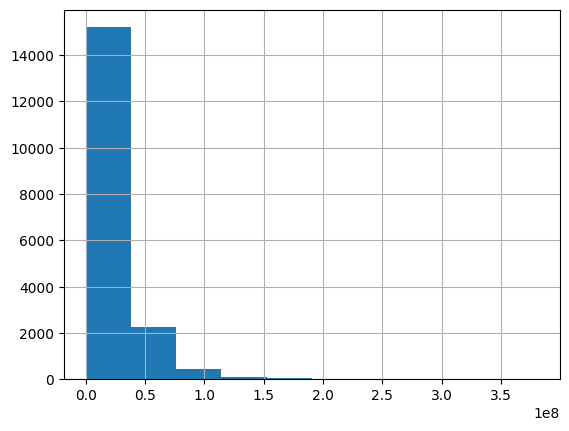

In [57]:
# Look at Expenditures distribution
dict_df_HBS['2018']['GASTOMON'].hist();

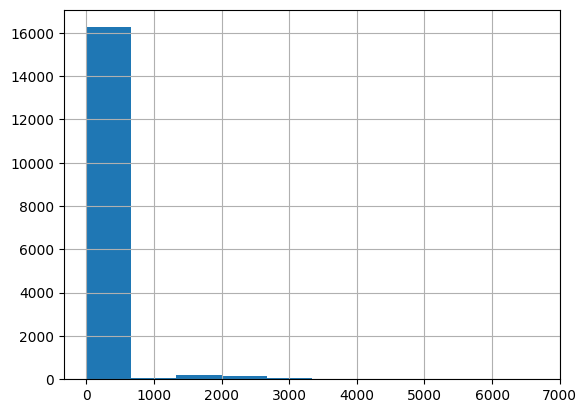

In [58]:
# Check distribution of purchases
dict_df_HBS['2022']['code_07111'].hist();

> All expenses and purchase of cars show left skewed distribution with the  majority of households from the sample not spending or spending little.

In [126]:
def GetExpenses(dict_:dict, years:list, codeList:list, Factor:str):
        '''
        INPUT: 
        dict_- Dictionary with DataFrames
        years - list of years to analize
        codeList - list with codes to be added
        Factor - spatial weight


        OUTPUT: 
        series expensesof anual expenses (multiplied by 12) 
        for whole population (multiplied by factor).
        '''
        # creation of series
        total_expenses_list = []
        for year in years:
                total_expense_year = 0
                if len(codeList) == 1:
                        anual_expense1 = (dict_[year][codeList[0]]* 12)*(
                                dict_[year][Factor])
                        total_expense_year = anual_expense1.sum()
                        total_expenses_list.append(total_expense_year)
                else:
                        for i in range(len(codeList)):
                                anual_expense1 = (dict_[year][codeList[i]]* 12)*(
                                        dict_[year][Factor])
                                total_expense_1 = anual_expense1.sum()
                                total_expense_year += total_expense_1
                        total_expenses_list.append(total_expense_year)
        print(total_expenses_list)
        colors = ['#7fc97f', '#beaed4', '#fdc086','#386cb0']
        plt.bar(years,total_expenses_list, color = random.choice(colors));
        return total_expenses_list

[21045368607.239998, 23105188648.899998, 17177735689.48, 18691055897.22, 19989635903.269997]


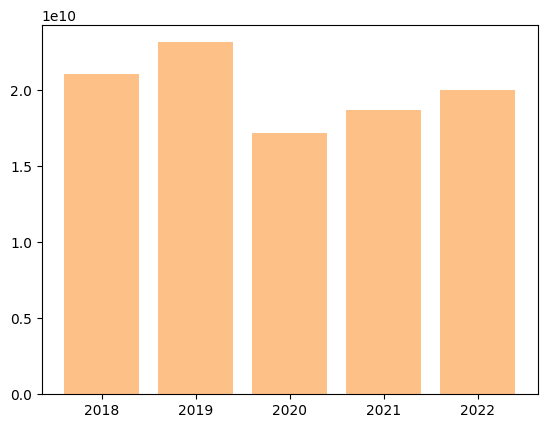

In [127]:
code_list_car_purchase = ['code_07111', 'code_07112']
total_expenses_privateCar = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list, 'FACTOR_y')

In [114]:
# Test function
expenses = dict_df_EPF_all_expenses['2018'][dict_df_EPF_all_expenses['2018']['CODIGO'] == '07111']
expenses_ = dict_df_EPF_all_expenses['2018'][dict_df_EPF_all_expenses['2018']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

expenses = dict_df_EPF_all_expenses['2022'][dict_df_EPF_all_expenses['2022']['CODIGO'] == '07111']
expenses_ = dict_df_EPF_all_expenses['2022'][dict_df_EPF_all_expenses['2022']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

19989635903.27

From the visual inspecion one cannot tell that expenditures on private cars are decreasing. On the contrary, the amount spent was rising before COVID-19 dropped then and now are on another raising trend. It is true that this displays the amount spent not the number of cars purchased.

**Statistical Comparison**

The samples from different years will be compared testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As the expenditures are not normally distributed (shown in the histograms) the test employed to check their differences is the H-test.  
`The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.`

In [141]:
# Test car purchases
stats.kruskal(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112'], 
              dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112'], 
              dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112'], 
              dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112'], 
              dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112'])

KruskalResult(statistic=125.07530002178086, pvalue=4.3981986118945517e-26)

The output shows that the test statistic is 125.075 and the corresponding p-value is 4.3981986118945517e-26 (close to 0).  
Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The tests sugest differences in the purchases of cars over the years but these differences cannot be attributed to the arrival of new mobility ways.

_1.2 Exploration of traditional fuel and alternative fuels spendings_

**Visual inspection**

[23562759126.910004, 23852994414.940002, 16166396462.05, 20925365048.08, 27012945039.670002]


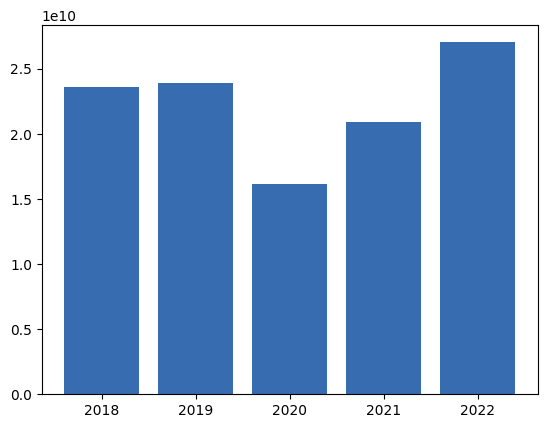

In [138]:
# Traditional fuel expenditure
code_list_fuel = ['code_07221', 'code_07222']
total_expenses_fuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_fuel, 'FACTOR_y')

Same as with car purchases but more homogeneous between 2018 and 2019. Rising trend before and after COVID-19 but different in magnitudes.

[17491495.34, 14587018.91, 33094679.630000003, 34270898.09, 50878726.39]


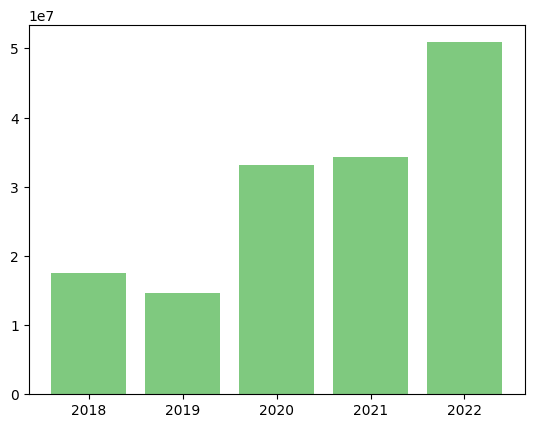

In [137]:
# Alternative fuels
code_list_alternative = ['code_07223']
total_expenses_altFuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_alternative, 'FACTOR_y')

This shows a different history. This plot shows an increase in the purchase of alternative fuels over the years.  
Inflation also plays a huge rol here.
It is important to notice that the fuel spending is around 1x10^<sup>10</sup> and alternative fuel spending 1x10<sup>7</sup> .

*1.3 Driving licences and private vehicle circulatory tax spendings*

**Visual inspection**

[873234738.3199999, 1002134778.8400002, 772427439.6199999, 1016163116.28, 951832964.51]


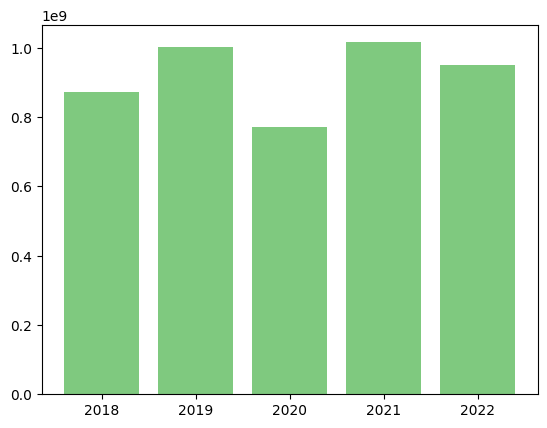

In [139]:
# Driving license 
code_list_driving = ['code_07244']
total_expenses_drivngLicence = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_driving, 'FACTOR_y')

This one shows rising tendency before covid then up in 2021 and could seem as if it was decreasing.

[640135606.5400001, 648682078.17, 626279699.26, 672186639.6999999, 705255389.7299999]


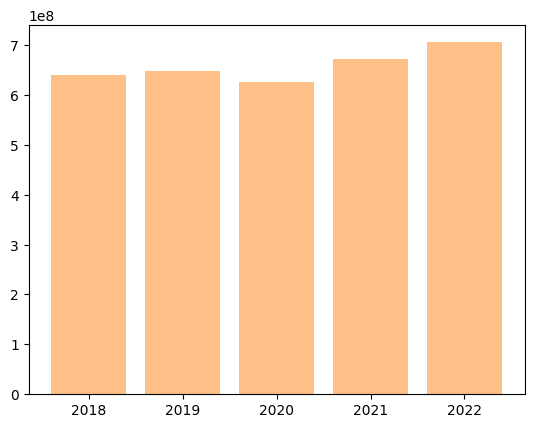

In [140]:
# Circulatory tax
code_list_ITV = ['code_07245']
total_expenses_ITV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_ITV, 'FACTOR_y')

**Statistical Comparison**

In [142]:
# Test driving licences
stats.kruskal(dict_df_HBS['2018']['code_07244'], dict_df_HBS['2019']['code_07244'], dict_df_HBS['2020']['code_07244'], dict_df_HBS['2021']['code_07244'], dict_df_HBS['2022']['code_07244'])

KruskalResult(statistic=200.5711956453368, pvalue=2.8318219715746434e-42)

The output shows that the test statistic is 200.57 and the corresponding p-value is 7.56028150286148e-24 (close to 0).  
Since the p-value is less than .05, we reject the null hypothesis of the H test.  
The tests sugest differences in the obtention of driving licenses over the years but these differences cannot be attributed to the arrival of new mobility ways.

#### 2. Are Personal Mobility Vehicles purchases on a rise?

_2.1 Exploration of personal mobility vehicles purchases_

**Visual inspection**

[1086993492.8500001, 1676430003.53, 1211877694.85, 1473865811.06, 1551879649.73]


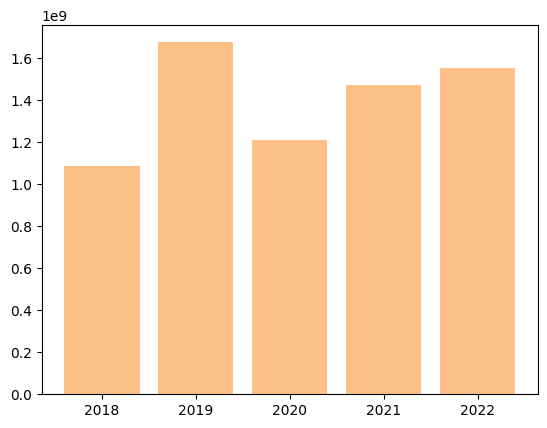

In [143]:
# Plot personal mobility purchases
code_list_PMV = ['code_07120', 'code_07130']
total_expenses_PMV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

Personal mobility vehicles display also the same tendencies: steep rising trend before 2020. Fall in 2020 and another rising period since COVID-19. The steep rise in the purchases of PTV from 2018 to 2019 seems proportionaly higher than the steep increase in car purchases from 2018 to 2019.

#### 3. Are combined public transportation tickets and shared options on the rise?

_3.1 Exploration of public transportation individual and combined tickets_

[1203363424.53, 1138884456.42, 552074697.21, 645311742.3, 749966903.99]


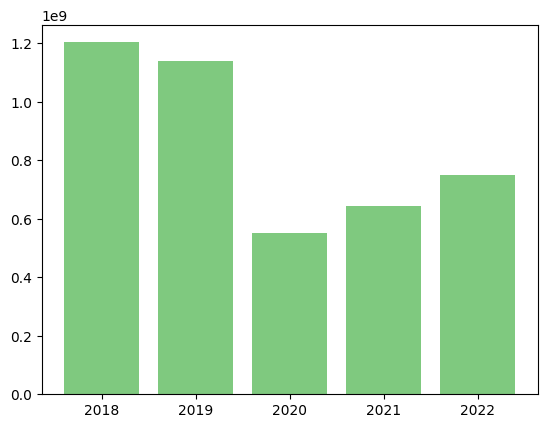

In [147]:
# Plot public transportation spendings (individual usage)
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
total_expenses_urbanPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PT, 'FACTOR_y')

[483198277.36, 493270226.8, 227503469.82999998, 275975219.15, 349595938.34000003]


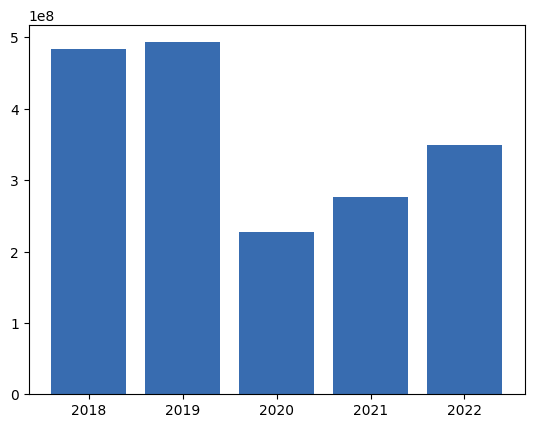

In [148]:
# Plot public transportation spendings (combined usage)
code_list_cPT = ['code_07322']
total_expenses_combinedPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_cPT, 'FACTOR_y')

_3.2 Exploratin of shared mobility options expenditures_

[721998117.8100001, 707370371.39, 424022576.96, 512416811.13, 577938142.9399999]


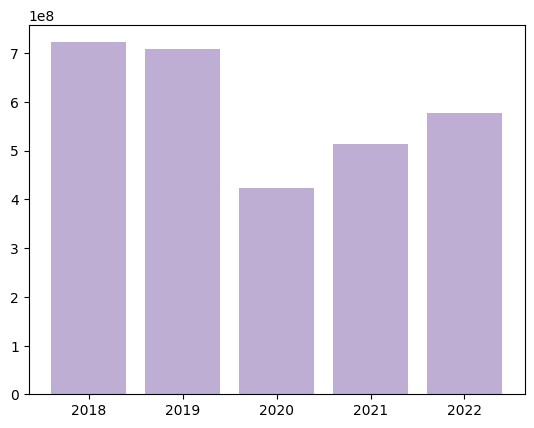

In [149]:
# Plot shared mobility expenditures
code_list_Shared = ['code_07324']
total_expenses_sharedMobility = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_Shared, 'FACTOR_y')

#### 4. What variables correlate well with car-oriented mobility?

<a id='result'></a>
## 5. Result Evaluation

<a id='conclusions'></a>
## 6. Conclusions

<a id='Refere'></a>
## 7. References